In [145]:
# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

In [20]:
import pandas as pd
import numpy as np

### Loading data

In [82]:
app2_df = pd.read_excel('Review Data2.xlsx')

### Data Overview with Skimpy

This code uses the `skimpy` library to generate a summary of the dataframe `app2_df`.

**Output Summary:**
- **Dataframe Summary:**
  - **Number of rows:** 84,696
  - **Number of columns:** 3
- **Column Details:**
  - **Rating:**
    - No missing values (0% NA)
    - Mean value: 3.9
    - Standard deviation: 1.6
    - Histogram shows a skew towards higher ratings.
  - **CleanText:**
    - No missing values (0% NA)
    - Average words per row: 8.1
    - Total words: 687,527

**Inference:**
- The dataset is well-structured with no missing values in any of the columns.
- The `CleanText` column is densely populated with an average of 8.1 words per review, providing a substantial amount of text data for sentiment analysis.

In [8]:
from skimpy import skim
skim(app2_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 84696  │ │ int32       │ 2     │                                                          │
│ │ Number of columns │ 3      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA   ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25     ┃ p50     ┃ p75     ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ ID              │    0 │      0 │   42000 │   24000 │   1 │   21000 │   42000 │   64000 │  85000 │ ▇▇▇▇▇▇  │  │
│ │ rating          │    0 │      0 │     3.9 │     1.6 │   1 │       3 │       5 │       5 │      5 │ ▃   ▂▇  │  │
│ └─────────────────┴──────┴────────┴─────────┴─────────┴─────┴─────────┴─────────┴─────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ CleanText                 │       0 │          0 │                          8.1 │                   687527 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### Removing Duplicate Text Entries

This code identifies and removes duplicate entries in the `CleanText` column of the `app2_df` dataframe. The steps are as follows:
1. **Identify Duplicates:** 
   - `duplicate = app2_df[['CleanText']].duplicated()` marks duplicated `CleanText` entries as `True`.
2. **Filter Out Duplicates:** 
   - `app2_df = app2_df.loc[duplicate == False]` retains only unique `CleanText` entries.
3. **Reset Index:**
   - `app2_df = app2_df.reset_index(drop=True)` resets the index of the dataframe to maintain a clean index sequence.
4. **Print Number of Duplicates Dropped:** 
   - `print('Drop Duplicated:', duplicate.sum())` outputs the number of duplicated entries that were removed.

**Inference:**
- The dataset originally contained 22,950 duplicate text entries in the `CleanText` column.
- These duplicates have been successfully removed, ensuring that each review text is unique.
- This step is crucial for accurate sentiment analysis as duplicate entries can skew the model's learning and evaluation processes.

In [46]:
duplicate = app2_df[['CleanText']].duplicated()
app2_df      = app2_df.loc[duplicate==False]
app2_df = app2_df.reset_index(drop=True)
print('Drop Duplicated:',duplicate.sum())

Drop Duplicated: 22950


In [47]:
app2_df.shape

(61746, 3)

### Text Preprocessing

In [48]:
import re
def clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text)  # Remove RT
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.strip()  # Remove leading and trailing spaces
    return text

# Apply the clean_text function to the 'text' column
app2_df['Cleaned_Text'] = app2_df['CleanText'].apply(lambda x: clean_text(str(x)) if pd.notnull(x) else '')

### All text lowered

In [49]:
app2_df['Cleaned_Text'] = app2_df['Cleaned_Text'].str.lower()

### Removing Stopwords from Text Data

This code removes stopwords from the text data in the `CleanText` column using the NLTK library.

**Inference:**
- Stopwords have been successfully removed from the `CleanText` column, which will enhance the quality of text data for sentiment analysis by eliminating common, non-informative words.
- This preprocessing step is crucial for improving model performance by focusing on the most meaningful words in the text data.

In [50]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
app2_df['Cleaned_Text'] = app2_df['Cleaned_Text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Removing emojies if present in Text Data

In [51]:
import emoji
# Function to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

# Apply remove_emojis function to 'Text' column
app2_df['Cleaned_Text'] = app2_df['Cleaned_Text'].apply(remove_emojis)

### Lemmatizing Text Data

This code applies lemmatization to the text data in the `Cleaned_Text` column using the NLTK library.

**Steps:**
1. **Import and Download:**
   - `from nltk.stem import WordNetLemmatizer` imports the `WordNetLemmatizer` class from NLTK.
   - `nltk.download('wordnet')` downloads the WordNet corpus required for lemmatization.
2. **Initialize Lemmatizer:**
   - `wordnet_lemmatizer = WordNetLemmatizer()` initializes the lemmatizer.
3. **Apply Lemmatization:**
   - `app2_df['Cleaned_Text'] = app2_df['Cleaned_Text'].apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word, pos='v') for word in x.split()]))` applies the lemmatizer to each word in the `Cleaned_Text` column. It uses the verb part-of-speech (`pos='v'`) to convert words to their base forms, then joins the lemmatized words back into a string.

**Inference:**
- Lemmatization has been applied to the text data, reducing words to their base or root form. This helps in standardizing the text, making it more suitable for sentiment analysis by grouping different forms of a word into a single representation.
- This step improves the quality of text data by addressing variations in word forms, thus enhancing the model's ability to understand and predict sentiment accurately.

In [52]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
# Intilize Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Apply 
app2_df['Cleaned_Text'] = app2_df['Cleaned_Text'].apply(lambda x: ' '.join([wordnet_lemmatizer.lemmatize(word , pos='v') for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [53]:
app2_df.head()

,ID,CleanText,rating,Cleaned_Text
0,1,customer support available though marked websi...,1,customer support available though mark website...
1,2,trust issues sell fake hotel,1,trust issue sell fake hotel
2,3,take money hotel close,1,take money hotel close
3,4,slow,3,slow
4,5,bad hard talk customer service request refund ...,1,bad hard talk customer service request refund ...


### Cell 6: Analyzing Sentiment with VADER

This code defines a function to analyze sentiment using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool.

**Steps:**
1. **Import VADER:**
   - `from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer` imports the `SentimentIntensityAnalyzer` from the VADER library.
2. **Define Sentiment Analysis Function:**
   - `def analyze_sentiment_vader(text):` defines a function to analyze the sentiment of a given text.
   - `analyzer = SentimentIntensityAnalyzer()` initializes the VADER sentiment analyzer.
   - `vs = analyzer.polarity_scores(text)` computes the sentiment scores for the input text.
   - The function returns:
     - `'positive'` if the `compound` score is greater than or equal to 0.05,
     - `'neutral'` if the `compound` score is between -0.05 and 0.05,
     - `'negative'` if the `compound` score is less than -0.05.

**Inference:**
- This function categorizes the sentiment of text into three classes: positive, neutral, or negative, based on the compound score provided by the VADER tool.
- VADER is particularly effective for analyzing sentiment in social media and short text data, making it suitable for this text dataset. This classification will help in understanding the overall sentiment distribution of the reviews in the dataset.

In [54]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def analyze_sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(text)
    if vs['compound'] >= 0.05:
        return 'positive'
    elif vs['compound'] > -0.05 and vs['compound'] < 0.05:
        return 'neutral'
    else:
        return 'negative'

In [57]:
app2_df.loc[:, 'sentiment_vader'] = app2_df['Cleaned_Text'].apply(analyze_sentiment_vader)

In [58]:
app2_df = app2_df.drop(columns=['CleanText'])

In [62]:
app2_df.head(10)

,ID,rating,Cleaned_Text,sentiment_vader
0,1,1,customer support available though mark website...,positive
1,2,1,trust issue sell fake hotel,positive
2,3,1,take money hotel close,neutral
3,4,3,slow,neutral
4,5,1,bad hard talk customer service request refund ...,negative
5,6,5,simple fast yet check resort yet,neutral
6,7,2,ok whatever,positive
7,8,5,easy navigate nonsense interface like,positive
8,9,5,useful apps,positive
9,10,5,easy book payment,positive


### Saving new file with sentiment_vader column

In [60]:
app2_df.to_csv('app2_SentimentVADER.csv', index=False)

In [61]:
app2_new_df = pd.read_csv('app2_SentimentVADER.csv')

### Generating Word Clouds for Each Sentiment

This code generates and visualizes word clouds for different sentiment categories: positive, negative, and neutral.

**Define Function:**
   - `def generate_wordcloud(text, title):` defines a function to create and display a word cloud from the input text.
   - `wordcloud = WordCloud(width=1200, height=400, background_color='white').generate(text)` generates the word cloud image.
   - `plt.figure(figsize=(10, 6))` sets the figure size for the plot.
   - `plt.imshow(wordcloud, interpolation='bilinear')` displays the word cloud image.
   - `plt.title(title)` sets the title of the plot.
   - `plt.axis('off')` hides the axes for a cleaner view.
   - `plt.show()` renders the plot.
3. **Prepare Text Data:**
   - `positive_text`, `negative_text`, and `neutral_text` aggregate the text data for each sentiment category by concatenating all `Cleaned_Text` entries corresponding to each sentiment label.
4. **Generate Word Clouds:**
   - `generate_wordcloud(positive_text, 'Positive Sentiment Word Cloud')` creates a word cloud for positive sentiments.
   - `generate_wordcloud(negative_text, 'Negative Sentiment Word Cloud')` creates a word cloud for negative sentiments.
   - `generate_wordcloud(neutral_text, 'Neutral Sentiment Word Cloud')` creates a word cloud for neutral sentiments.

**Inference:**
- The word clouds visually represent the most frequent words associated with each sentiment category.
- These visualizations help in understanding the common themes and keywords that dominate positive, negative, and neutral reviews, providing insight into the sentiment-driven language used by users.

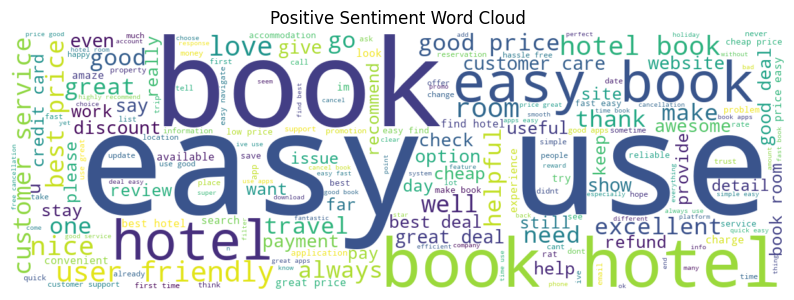

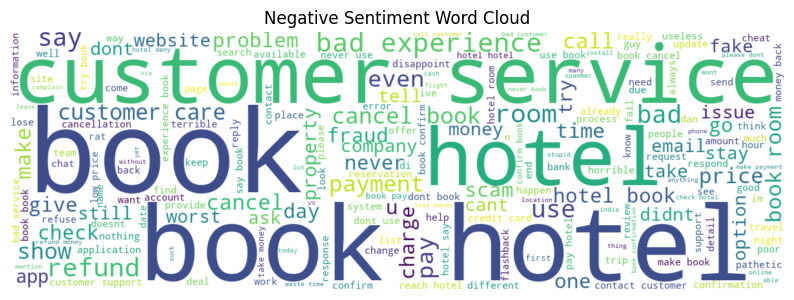

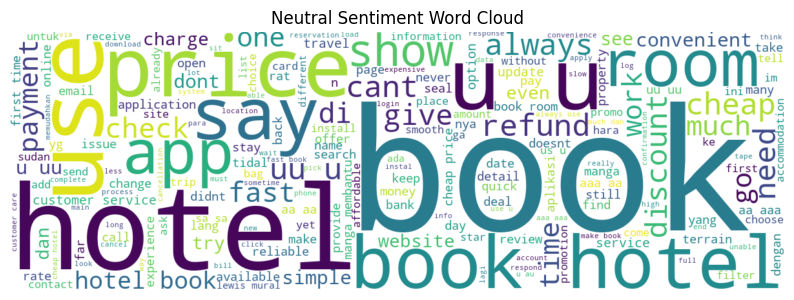

In [144]:
from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=1200, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment
positive_text = ' '.join(app2_new_df[app2_new_df['sentiment_vader'] == 'positive']['Cleaned_Text'])
negative_text = ' '.join(app2_new_df[app2_new_df['sentiment_vader'] == 'negative']['Cleaned_Text'])
neutral_text = ' '.join(app2_new_df[app2_new_df['sentiment_vader'] == 'neutral']['Cleaned_Text'])

generate_wordcloud(positive_text, 'Positive Sentiment Word Cloud')
generate_wordcloud(negative_text, 'Negative Sentiment Word Cloud')
generate_wordcloud(neutral_text, 'Neutral Sentiment Word Cloud')

###  Top 10 word frequencies for each sentiment

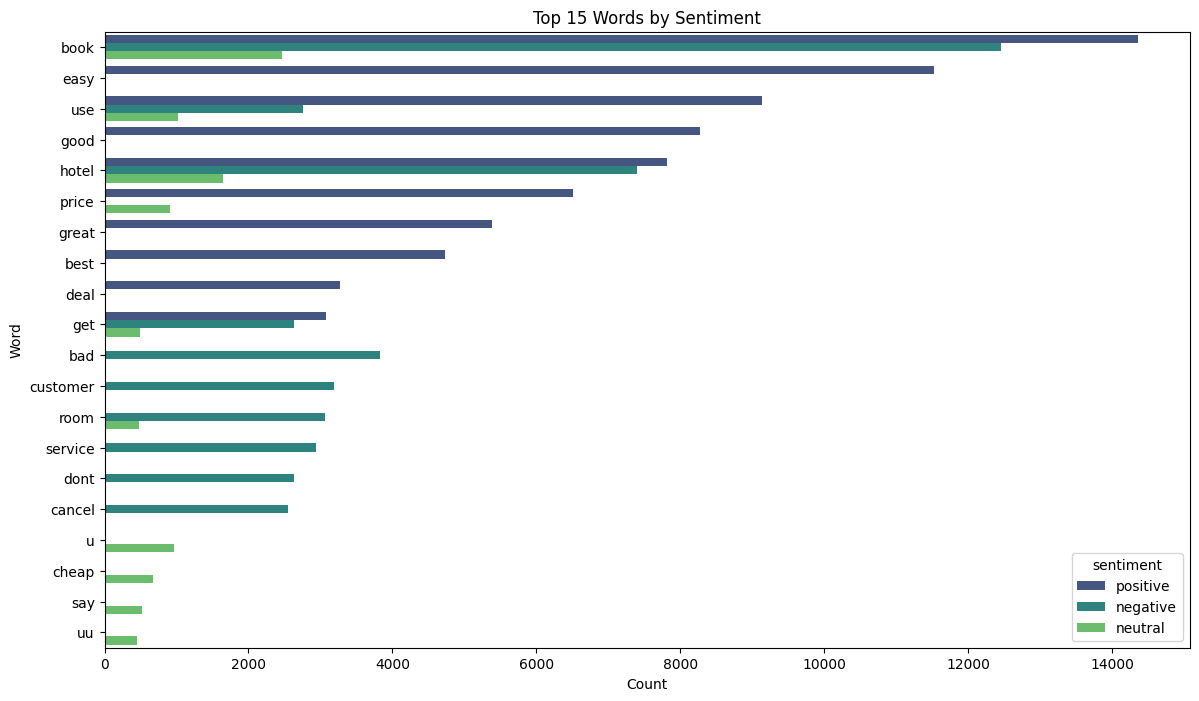

In [188]:
from collections import Counter

# Tokenize text and count word frequencies for each sentiment
def get_top_n_words(text, n=10):
    words = text.split()
    word_freq = Counter(words)
    common_words = word_freq.most_common(n)
    return common_words

# Get top 15 words for each sentiment
positive_words = get_top_n_words(positive_text, 10)
negative_words = get_top_n_words(negative_text, 10)
neutral_words = get_top_n_words(neutral_text, 10)

# Create dataframes for plotting
def create_freq_df(common_words, sentiment):
    words, counts = zip(*common_words)
    return pd.DataFrame({'word': words, 'count': counts, 'sentiment': sentiment})

df_positive = create_freq_df(positive_words, 'positive')
df_negative = create_freq_df(negative_words, 'negative')
df_neutral = create_freq_df(neutral_words, 'neutral')

# Combine dataframes
freq_df = pd.concat([df_positive, df_negative, df_neutral])

# Plot the frequency bar graph
plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='word', hue='sentiment', data=freq_df, palette='viridis')
plt.title('Top 15 Words by Sentiment')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()


### Creating plots of the number of words and characters present in each sentiment

- **Calculate Number of Words and Characters**: 
  - `word_count` column is created by splitting the `Cleaned_Text` into words and counting them.
  - `char_count` column is created by calculating the length of each `Cleaned_Text`.

- **Group by Sentiment**: 
  - `word_count_by_sentiment` and `char_count_by_sentiment` store the average word count and character count, respectively, grouped by `sentiment_vader`.

- **Plotting**:
  - The first plot shows the average number of words for each sentiment category.
  - The second plot shows the average number of characters for each sentiment category.

These plots help in understanding the distribution of word and character counts across different sentiments, providing insights into the nature of the text data for each sentiment category.

**Inference:**
- Text carrying Negative Sentiment has the maximum average numbers of words and characters.


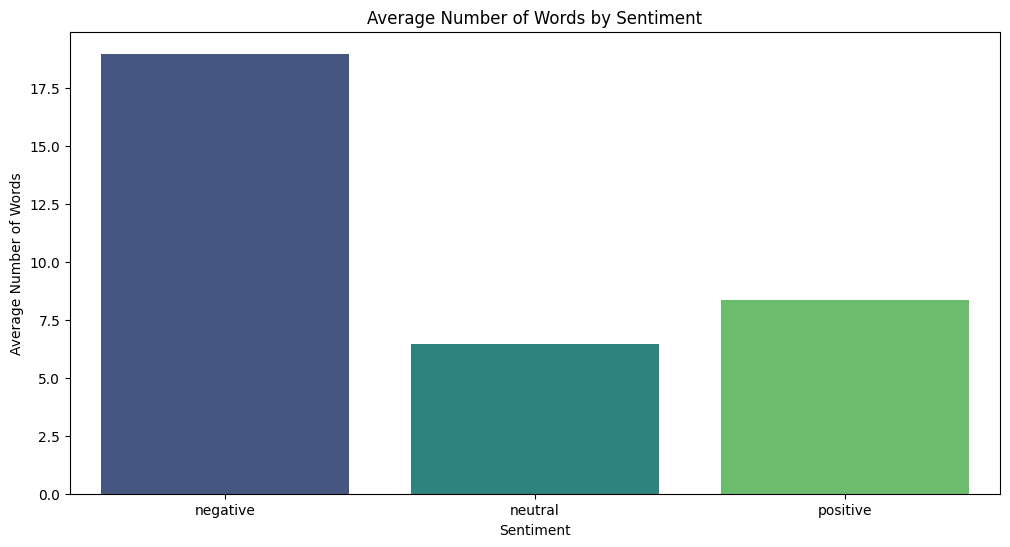

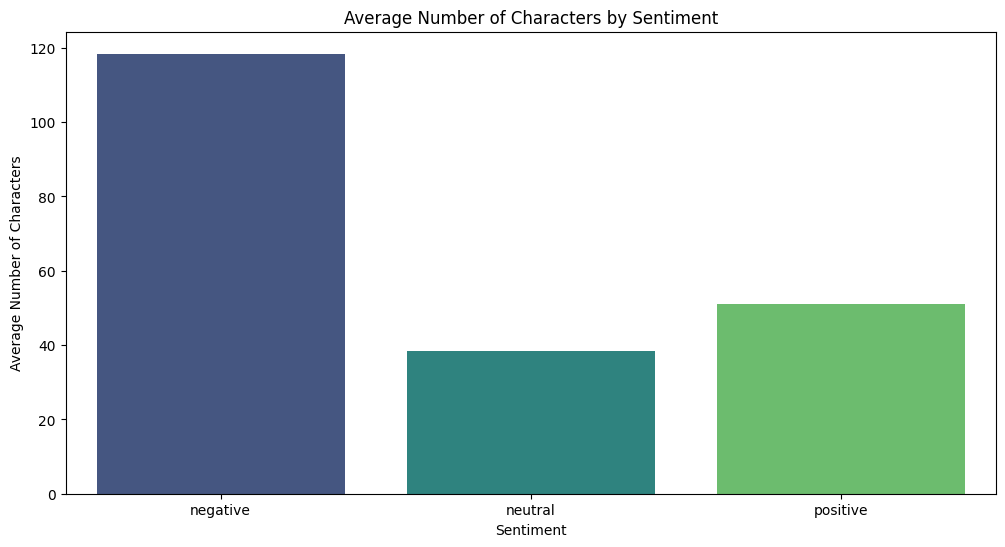

In [189]:
# Calculate number of words and characters for each entry
app2_new_df['word_count'] = app2_new_df['Cleaned_Text'].apply(lambda x: len(x.split()))
app2_new_df['char_count'] = app2_new_df['Cleaned_Text'].apply(lambda x: len(x))

# Group by sentiment and calculate the average word and character counts
word_count_by_sentiment = app2_new_df.groupby('sentiment_vader')['word_count'].mean().reset_index()
char_count_by_sentiment = app2_new_df.groupby('sentiment_vader')['char_count'].mean().reset_index()

# Plot the average number of words by sentiment
plt.figure(figsize=(12, 6))
sns.barplot(x='sentiment_vader', y='word_count', data=word_count_by_sentiment, palette='viridis')
plt.title('Average Number of Words by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Number of Words')
plt.show()

# Plot the average number of characters by sentiment
plt.figure(figsize=(12, 6))
sns.barplot(x='sentiment_vader', y='char_count', data=char_count_by_sentiment, palette='viridis')
plt.title('Average Number of Characters by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Number of Characters')
plt.show()


### Visualizing Sentiment Distribution with a Count Plot

This code generates a count plot to visualize the distribution of sentiment categories determined by VADER.

**Annotate Bars:**
   - `for p in plt.gca().patches:` iterates over each bar in the plot.
   - `plt.gca().annotate(...)` adds count labels above each bar for clarity.

**Inference:**
- The count plot provides a clear visualization of the sentiment distribution in the dataset, showing how many reviews fall into each sentiment category (positive, neutral, negative).
- Annotating the bars with count values helps in quickly assessing the number of reviews in each sentiment category, facilitating a better understanding of the sentiment landscape in the app data.
- `Data is imbalanced` so to handle it will use `Cost Sensitive Learning (Calculating Class Weights for each class)`

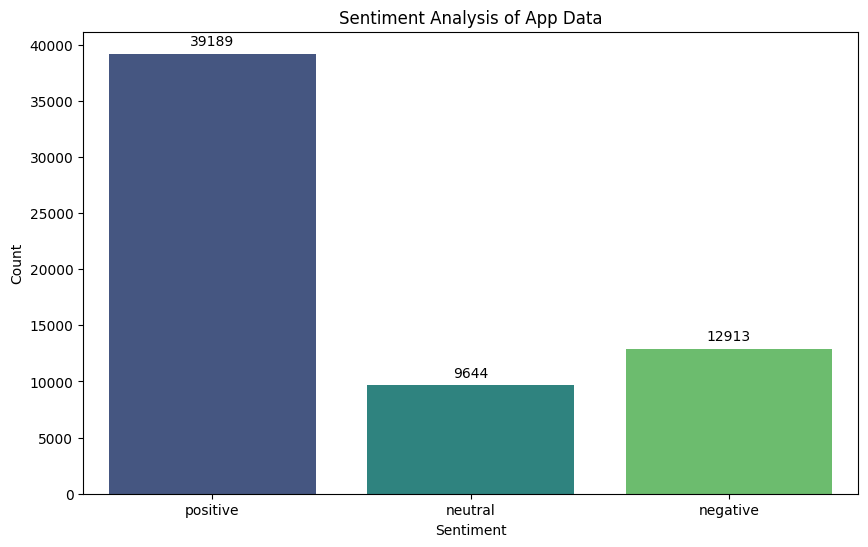

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_vader', data=app2_new_df, palette='viridis')
plt.title('Sentiment Analysis of App Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Annotate each bar with the count value
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

plt.show()

### Calculating Class Weights

**Explanation:**
This cell calculates the class weights to address class imbalance in the dataset. Class weights are used to give more importance to underrepresented classes during model training.

**Steps:**
1. **Calculate Class Weights:**
   - **Extract Unique Classes:** `np.unique(app2_new_df['sentiment_vader'])` identifies the unique sentiment classes in the dataset.
   - **Compute Class Weights:** `compute_class_weight('balanced', classes=unique_classes, y=app2_new_df['sentiment_vader'])` calculates the class weights using the 'balanced' strategy, which adjusts weights inversely proportional to class frequencies.
   - **Create Dictionary:** `class_weights_dict = {unique_classes[i]: class_weights[i] for i in range(len(class_weights))}` creates a dictionary mapping each class to its corresponding weight.

**Inference:**
- The class weights have been computed to balance the influence of each sentiment class during model training. This helps to ensure that the model pays adequate attention to all classes, even if some are underrepresented.
- The dictionary `class_weights_dict` shows the computed weights for each sentiment category, which can be used to adjust the model's learning process and improve performance on imbalanced datasets.

In [69]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate the class weights
unique_classes = np.unique(app2_new_df['sentiment_vader'])
class_weights = compute_class_weight('balanced', 
                                     classes=unique_classes,
                                     y=app2_new_df['sentiment_vader'])

class_weights_dict = {unique_classes[i]: class_weights[i] for i in range(len(class_weights))}
print(class_weights_dict)

{'negative': 1.5938976225509176, 'neutral': 2.134176690170054, 'positive': 0.5251983975095053}


### Encoding Sentiment Labels

In this cell, sentiment labels are encoded into numerical values for machine learning purposes. The `LabelEncoder` transforms the sentiment labels into integers.

**Steps:**
1. **Initialize LabelEncoder:** Creates an instance of the `LabelEncoder` class.
2. **Encode Sentiment Labels:** Transforms the categorical sentiment labels (`'sentiment_vader'`) into numerical values, where:
   - **Positive** sentiment is encoded as **2**.
   - **Neutral** sentiment is encoded as **1**.
   - **Negative** sentiment is encoded as **0**.

**Inference:**
- The sentiment labels have been successfully converted into numerical format, which is necessary for training machine learning models.
- The `sentiment_encoded` column provides numerical representations of sentiment categories, making it suitable for model input and evaluation.

In [70]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
app2_new_df['sentiment_encoded'] = label_encoder.fit_transform(app2_new_df['sentiment_vader'])
app2_new_df.head()

,ID,rating,Cleaned_Text,sentiment_vader,sentiment_encoded
0,1,1,customer support available though mark website...,positive,2
1,2,1,trust issue sell fake hotel,positive,2
2,3,1,take money hotel close,neutral,1
3,4,3,slow,neutral,1
4,5,1,bad hard talk customer service request refund ...,negative,0


### Some Null Values observed after applying Text Preprocessing since few row contain only stopwords e.g; `ID: 4295`

In [80]:
app2_new_df[app2_new_df['Cleaned_Text'].isna()]

,ID,rating,Cleaned_Text,sentiment_vader,sentiment_encoded
2103,2364,5,NaN,neutral,1
3788,4295,3,NaN,neutral,1
5318,6036,5,NaN,neutral,1
7663,8755,5,NaN,neutral,1
11768,13536,5,NaN,neutral,1
20567,24353,1,NaN,neutral,1
30121,36612,5,NaN,neutral,1
50347,67666,4,NaN,neutral,1
59225,81136,5,NaN,neutral,1
59989,82187,5,NaN,neutral,1


In [88]:
app2_df[app2_df['ID']==4295]

,ID,CleanText,rating
4294,4295,To,3


### Dropped Rows containing null values

In [90]:
app2_new_df.dropna(inplace=True)

### Tokenizing Text Data

**Explanation:**
This cell prepares the text data for use in a deep learning model by tokenizing the text, which involves converting words into numerical representations.

**Steps:**
1. **Initialize Tokenizer:**
   - `Tokenizer(oov_token='<nothing>')` initializes a `Tokenizer` object with a specified out-of-vocabulary (OOV) token `<nothing>`, which represents any words not found in the training set.
2. **Fit Tokenizer on Texts:**
   - `tokenizer.fit_on_texts(app2_new_df['Cleaned_Text'])` trains the tokenizer on the `Cleaned_Text` column of the dataframe, mapping each unique word to a unique integer.

**Inference:**
- The tokenizer has processed the text data, creating a word-to-integer mapping. This mapping is crucial for converting text into sequences of integers that can be fed into machine learning models.
- The use of an OOV token helps handle words that were not present during training, improving the model's robustness to unseen words.

In [75]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='<nothing>')

In [91]:
tokenizer.fit_on_texts(app2_new_df['Cleaned_Text'])

### Viewing the Tokenizer's Word Index

This cell displays the `word_index` attribute of the tokenizer, which provides a dictionary mapping words to their corresponding integer indices.

**Access Word Index:**
   - `tokenizer.word_index` retrieves the dictionary of word-to-integer mappings created by the tokenizer.

**Inference:**
- The `word_index` dictionary shows how each unique word in the dataset has been assigned a specific integer. This mapping is essential for converting text data into numerical format, allowing it to be used in neural network models.
- Words that are more frequent or appear earlier in the text data will generally have lower integer indices, while less common words receive higher indices.

In [92]:
tokenizer.word_index

{'<nothing>': 1,
 'book': 2,
 'hotel': 3,
 'use': 4,
 'easy': 5,
 'price': 6,
 'good': 7,
 'get': 8,
 'room': 9,
 'customer': 10,
 'service': 11,
 'great': 12,
 'best': 13,
 'time': 14,
 'bad': 15,
 'dont': 16,
 'say': 17,
 'apps': 18,
 'pay': 19,
 'make': 20,
 'hotels': 21,
 'money': 22,
 'deal': 23,
 'experience': 24,
 'refund': 25,
 'cancel': 26,
 'give': 27,
 'find': 28,
 'payment': 29,
 'always': 30,
 'cheap': 31,
 'even': 32,
 'show': 33,
 'go': 34,
 'try': 35,
 'discount': 36,
 'check': 37,
 'one': 38,
 'never': 39,
 'love': 40,
 'fast': 41,
 'like': 42,
 'thank': 43,
 'call': 44,
 'contact': 45,
 'u': 46,
 'user': 47,
 'help': 48,
 'also': 49,
 'friendly': 50,
 'charge': 51,
 'offer': 52,
 'card': 53,
 'well': 54,
 'need': 55,
 'cant': 56,
 'support': 57,
 'care': 58,
 'really': 59,
 'please': 60,
 'nice': 61,
 'travel': 62,
 'ever': 63,
 'stay': 64,
 'work': 65,
 'helpful': 66,
 'email': 67,
 'take': 68,
 'much': 69,
 'rat': 70,
 'back': 71,
 'application': 72,
 'didnt': 73,
 

### Viewing the Tokenizer's Document Count

This cell retrieves the `document_count` attribute of the tokenizer, which indicates the total number of documents (texts) that were processed by the tokenizer.

**Access Document Count:**
   - `tokenizer.document_count` returns the number of documents the tokenizer has processed.

**Inference:**
- Knowing the number of documents helps confirm that the tokenizer has been fitted on the complete dataset and that all texts have been considered in the tokenization process.

In [93]:
tokenizer.document_count

63840

In [95]:
app2_new_df['Cleaned_Text'].iloc[0]

'customer support available though mark website time book card detail take deduct book advance time check property owner take payment advance say early deduction freeze amount reflect back days hold amount days check go refund go use anymore suggest others directly connect'

### Converting Text to Sequences

This cell converts the cleaned text data into sequences of integers using the tokenizer. Each text is transformed into a list of integers corresponding to the word indices defined by the tokenizer.

**Inference:**
- The `sequences` variable contains the integer-encoded representation of each text, where each word is replaced by its corresponding integer index.
- This transformation is essential for feeding text data into deep learning models, as neural networks require numerical input. Each sequence represents the text in a format that can be processed by machine learning algorithms.

In [94]:
sequences = tokenizer.texts_to_sequences(app2_new_df['Cleaned_Text'])
sequences

[[10,
  57,
  92,
  270,
  1154,
  83,
  14,
  2,
  53,
  108,
  68,
  255,
  2,
  340,
  14,
  37,
  76,
  219,
  68,
  29,
  340,
  17,
  702,
  1444,
  773,
  97,
  1125,
  71,
  123,
  436,
  97,
  123,
  37,
  34,
  25,
  34,
  4,
  423,
  407,
  209,
  301,
  359],
 [163, 74, 564, 133, 3],
 [68, 22, 3, 296],
 [395],
 [15, 304, 329, 10, 11, 192, 25, 9, 27, 209, 160],
 [94, 41, 220, 37, 321, 220],
 [335, 997],
 [5, 260, 1275, 229, 42],
 [136, 18],
 [5, 2, 29],
 [2, 521, 12, 122, 12, 294, 6],
 [56, 2, 3, 30, 33, 582, 711, 320, 74, 60, 35],
 [12,
  357,
  333,
  454,
  103,
  2899,
  958,
  2,
  37,
  432,
  20,
  438,
  33,
  185,
  958,
  279,
  148,
  8,
  51,
  883,
  958,
  115,
  39,
  2,
  200,
  1295,
  17,
  169,
  8,
  22,
  71,
  123,
  487,
  353,
  21,
  51,
  53,
  26,
  37,
  107,
  317,
  2],
 [137, 68, 853, 2, 661, 35, 446, 117, 53, 49, 383, 14, 48, 67],
 [122, 129, 8, 13, 3, 2, 23, 313, 245, 692, 12, 52, 1539],
 [5, 4],
 [12, 6, 612],
 [32, 168, 708, 159, 361, 180, 

### Padding Sequences

This cell pads the sequences of integers to ensure that they all have the same length, which is required for consistent input size in neural network models.

**Pad Sequences:**
   - `pad_sequences(sequences, padding='post')` pads the sequences with zeros at the end (post-padding) so that all sequences have the same length. 

**Inference:**
- The `sequences` variable now contains uniformly sized sequences, with shorter sequences padded to match the length of the longest sequence in the dataset.
- Padding ensures that the input to the model is consistent in size, which is crucial for the neural network to process the data correctly and efficiently.

In [96]:
from keras.utils import pad_sequences
sequences = pad_sequences(sequences,padding='post')
sequences

array([[  10,   57,   92, ...,    0,    0,    0],
       [ 163,   74,  564, ...,    0,    0,    0],
       [  68,   22,    3, ...,    0,    0,    0],
       ...,
       [   7, 1334,   62, ...,    0,    0,    0],
       [ 136,   14,    4, ...,    0,    0,    0],
       [  12,  395,    0, ...,    0,    0,    0]])

### Splitting Data into Training and Test Sets

This cell splits the dataset into training and test sets for model evaluation.

**Split Data:**
   - `train_test_split(sequences, app2_new_df['sentiment_encoded'], test_size=0.2, random_state=42)` divides the sequences and corresponding sentiment labels into training and test sets.
   - **Training Set:** 80% of the data used to train the model.
   - **Test Set:** 20% of the data reserved for evaluating the model's performance.

**Inference:**
- The data has been split into training and test sets, ensuring that the model can be trained on a portion of the data and evaluated on a separate, unseen portion.
- The `random_state=42` ensures reproducibility of the split, allowing for consistent results across different runs.

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sequences, app2_new_df['sentiment_encoded'], test_size=0.2, random_state=42)
  

In [98]:
X_train[0]

array([  5,   4, 656,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0])

In [102]:
print(f'Total data for training : {X_train.shape[0]}')
print(f'Total data for testing : {X_test.shape[0]}')
print(f"""Total sentiments counts for train data : 
     {y_train.value_counts()}""")
print(f"""Total sentiments counts for test data : 
     {y_test.value_counts()}""") 

Total data for training : 49388
Total data for testing : 12348
Total sentiments counts for train data : 
     sentiment_encoded
2    31376
0    10360
1     7652
Name: count, dtype: int64
Total sentiments counts for test data : 
     sentiment_encoded
2    7813
0    2553
1    1982
Name: count, dtype: int64


In [104]:
# Max Len in X_train_sequences
maxlen = max(len(tokens) for tokens in X_train)
print("Maximum sequence length (maxlen):", maxlen)

Maximum sequence length (maxlen): 133


### Building and Compiling the LSTM Model

This cell defines and compiles a Bidirectional LSTM model for sentiment analysis.

**Steps:**
1. **Define Model Architecture:**
   - **Embedding Layer:** `Embedding(vocab_size+1, embedding_dim, input_length=max_length, embeddings_regularizer=regularizers.l2(0.0005))` converts integer sequences into dense vectors with L2 regularization.
   - **Bidirectional LSTM Layers:** Two `Bidirectional(LSTM(...))` layers capture long-term dependencies in both directions, with `return_sequences=True` for the first LSTM to pass the sequence to the next layer.
   - **Batch Normalization:** Applied after LSTM layers to normalize activations and improve training.
   - **Dropout Layers:** `Dropout(0.5)` layers are used to prevent overfitting by randomly setting 50% of the input units to zero during training.
   - **Dense Layers:** Two `Dense(...)` layers with ReLU and softmax activations for classification, with L2 regularization applied to weights and biases.

2. **Compile Model:**
   - `model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])` configures the model for training with sparse categorical crossentropy loss, Adam optimizer, and accuracy as a performance metric.

3. **Model Summary:**
   - `model.summary()` displays a summary of the model architecture, including the number of parameters and layer details.

**Inference:**
- The model architecture is designed to handle sequence data with Bidirectional LSTMs and regularization techniques to improve performance and generalization.
- The compilation with sparse categorical crossentropy is suitable for multi-class classification tasks, and the use of Adam optimizer helps in efficient training.

In [106]:
import keras
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

vocab_size = 63840
embedding_dim = 64
max_length = maxlen

model = Sequential([
    Embedding(vocab_size+1, embedding_dim, input_length=max_length, embeddings_regularizer = regularizers.l2(0.0005)),
    Bidirectional(LSTM(128, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.5),
    Bidirectional(LSTM(64)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(24, activation='relu', kernel_regularizer = regularizers.l2(0.0005), bias_regularizer = regularizers.l2(0.0005)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.001),bias_regularizer=regularizers.l2(0.001),)
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 133, 64)           4085824   
                                                                 
 bidirectional_2 (Bidirectio  (None, 133, 256)         197632    
 nal)                                                            
                                                                 
 batch_normalization_3 (Batc  (None, 133, 256)         1024      
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 133, 256)          0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                      

### Model Summary

1. **Embedding Layer:**
   - **Parameters:** `vocab_size * embedding_dim`
   - **Calculation:** `(63840 + 1) * 64 = 4,085,824`
   - **Explanation:** This includes the weights for the embedding vectors plus one extra entry for the out-of-vocabulary token.

2. **Bidirectional LSTM Layer (first):**
   - **Parameters:** `4 * ((input_dim + hidden_units) * hidden_units + hidden_units)`
   - **Calculation:** `4 * ((64 + 128) * 128 + 128) = 197,632`
   - **Explanation:** The `4` accounts for the gates in the LSTM (input, forget, output, and cell state), where `input_dim` is the embedding dimension and `hidden_units` is the number of LSTM units.

3. **Batch Normalization Layer (after first LSTM):**
   - **Parameters:** `2 * hidden_units`
   - **Calculation:** `2 * 256 = 512`
   - **Explanation:** One set of parameters for scaling and one for shifting the activations.

4. **Dropout Layer (after first LSTM):**
   - **Parameters:** `0`
   - **Explanation:** Dropout layers do not have trainable parameters.

5. **Bidirectional LSTM Layer (second):**
   - **Parameters:** `4 * ((hidden_units + hidden_units) * hidden_units + hidden_units)`
   - **Calculation:** `4 * ((256 + 128) * 64 + 64) = 164,352`
   - **Explanation:** Similar to the first LSTM layer but with different dimensions.

6. **Batch Normalization Layer (after second LSTM):**
   - **Parameters:** `2 * hidden_units`
   - **Calculation:** `2 * 128 = 256`
   - **Explanation:** For scaling and shifting activations.

7. **Dropout Layer (after second LSTM):**
   - **Parameters:** `0`
   - **Explanation:** No trainable parameters.

8. **Dense Layer (24 units):**
   - **Parameters:** `(input_dim * units) + units`
   - **Calculation:** `(128 * 24) + 24 = 3,096`
   - **Explanation:** Each unit in the Dense layer connects to all units from the previous layer plus a bias term.

9. **Batch Normalization Layer (after Dense):**
   - **Parameters:** `2 * units`
   - **Calculation:** `2 * 24 = 48`
   - **Explanation:** For scaling and shifting activations.

10. **Dropout Layer (after Dense):**
    - **Parameters:** `0`
    - **Explanation:** No trainable parameters.

11. **Dense Layer (output layer, 3 units):**
    - **Parameters:** `(input_dim * units) + units`
    - **Calculation:** `(24 * 3) + 3 = 75`
    - **Explanation:** Connects each unit in the Dense layer to all units from the previous layer plus a bias term.

**Summary of Total Parameters:**

- **Embedding Layer:** 4,085,824
- **Bidirectional LSTM (first):** 197,632
- **Batch Normalization (first):** 512
- **Dropout (first):** 0
- **Bidirectional LSTM (second):** 164,352
- **Batch Normalization (second):** 256
- **Dropout (second):** 0
- **Dense Layer (24 units):** 3,096
- **Batch Normalization (Dense):** 48
- **Dropout (Dense):** 0
- **Dense Layer (output):** 75

**Total Parameters Calculation:**

- **Total:** `4,085,824 (Embedding) + 197,632 (LSTM1) + 512 (BatchNorm1) + 0 (Dropout1) + 164,352 (LSTM2) + 256 (BatchNorm2) + 0 (Dropout2) + 3,096 (Dense1) + 48 (BatchNormDense) + 0 (DropoutDense) + 75 (Dense2) = 4,452,611`

### Setting Up Callbacks

This cell configures callbacks for the training process to enhance model performance and save the best model.

**Steps:**
1. **EarlyStopping Callback:**
   - **Purpose:** Monitors the validation loss during training.
   - **Parameters:**
     - `monitor='val_loss'`: Tracks validation loss.
     - `patience=5`: Number of epochs to wait for improvement before stopping training.
     - `restore_best_weights=True`: Restores model weights from the epoch with the best validation loss.

2. **ModelCheckpoint Callback:**
   - **Purpose:** Saves the model at the end of epochs where the validation loss is minimized.
   - **Parameters:**
     - `'best_model_updated.h5'`: File path where the best model will be saved.
     - `save_best_only=True`: Saves the model only when it achieves the best validation loss.

**Inference:**
- The **EarlyStopping** callback helps prevent overfitting by stopping training if the validation loss does not improve, saving time and computational resources.
- The **ModelCheckpoint** callback ensures that the best-performing model (in terms of validation loss) is saved, allowing for later retrieval and evaluation without needing to retrain the model.

In [107]:
# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model_updated.h5', save_best_only=True)
]

ValueError: Expected `class_weight` to be a dict with keys from 0 to one less than the number of classes, found {'negative': 1.5938976225509176, 'neutral': 2.134176690170054, 'positive': 0.5251983975095053}

### Training the Model

This cell trains the model using the specified parameters and callbacks.

**Steps:**
1. **Model Fitting:**
   - **Training Data:** `X_train` and `y_train`
   - **Epochs:** 15
   - **Validation Split:** 20% of the training data is used for validation.
   - **Batch Size:** 128
   - **Callbacks:** 
     - **EarlyStopping:** Stops training if validation loss does not improve for 5 epochs.
     - **ModelCheckpoint:** Saves the model with the best validation loss.
   - **Class Weights:** `class_weights_dict` adjusts the model's learning process to handle class imbalances.

**Inference:**
- The model will be trained for up to 15 epochs, but early stopping may reduce the actual number of epochs if no improvement in validation loss is observed.
- The use of class weights helps the model learn better from less frequent classes by giving them more importance during training.
- The best model based on validation loss will be saved for future use, ensuring that the model with the optimal performance is retained.

In [109]:
# Fit the model with callbacks
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2, batch_size=128, callbacks=callbacks, class_weight=class_weights_dict)

Epoch 1/15
309/309 [==============================] - 83s 155ms/step - loss: 0.8354 - accuracy: 0.7388 - val_loss: 0.6596 - val_accuracy: 0.8260
Epoch 2/15
309/309 [==============================] - 46s 148ms/step - loss: 0.3875 - accuracy: 0.9067 - val_loss: 0.6088 - val_accuracy: 0.7871
Epoch 3/15
309/309 [==============================] - 46s 149ms/step - loss: 0.3163 - accuracy: 0.9290 - val_loss: 0.4160 - val_accuracy: 0.8610
Epoch 4/15
309/309 [==============================] - 46s 149ms/step - loss: 0.2812 - accuracy: 0.9373 - val_loss: 0.9388 - val_accuracy: 0.7447
Epoch 5/15
309/309 [==============================] - 46s 148ms/step - loss: 0.3068 - accuracy: 0.9288 - val_loss: 0.3121 - val_accuracy: 0.9242
Epoch 6/15
309/309 [==============================] - 45s 147ms/step - loss: 0.2529 - accuracy: 0.9438 - val_loss: 0.2621 - val_accuracy: 0.9394
Epoch 7/15
309/309 [==============================] - 46s 150ms/step - loss: 0.2340 - accuracy: 0.9493 - val_loss: 0.2900 - val_ac

### Plotting Training and Validation Loss

This cell visualizes the training and validation loss over the epochs to evaluate the model's performance.

 **Plot Training and Validation Loss:**
   - **X-axis:** Number of epochs.
   - **Y-axis:** Loss value.
   - **Lines:**
     - **Training Loss:** Shows how the loss on the training data changes with each epoch.
     - **Validation Loss:** Shows how the loss on the validation data changes with each epoch.

**Inference:**
- **Training Loss:** Since it decreases steadily, the model is learning effectively from the training data.
- **Validation Loss:** As it also decreases and stays close to the training loss, the model generalizes well to new data. If it starts increasing while training loss decreases, this may indicate overfitting.

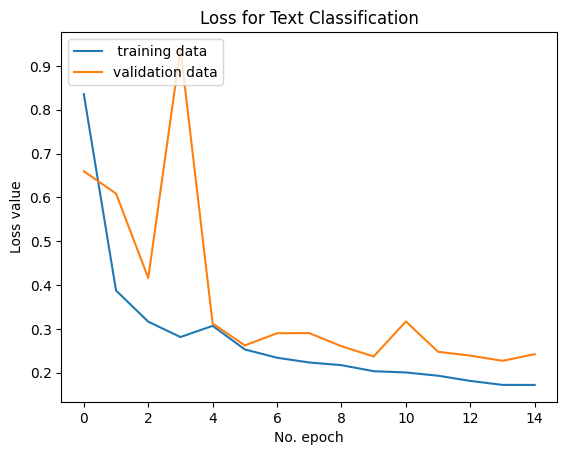

In [110]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

### Plotting Training and Validation Accuracy

This cell visualizes the training and validation accuracy over the epochs to assess how well the model is performing.

**Plot Training and Validation Accuracy:**
   - **X-axis:** Number of epochs.
   - **Y-axis:** Accuracy value.
   - **Lines:**
     - **Training Accuracy:** Tracks the accuracy of the model on the training data for each epoch.
     - **Validation Accuracy:** Tracks the accuracy of the model on the validation data for each epoch.

**Inference:**
- **Training Accuracy:** A steady increase suggests the model is effectively learning from the training data.
- **Validation Accuracy:** As it increases and remains close to the training accuracy, the model is likely generalizing well. A significant gap between training and validation accuracy may indicate overfitting.

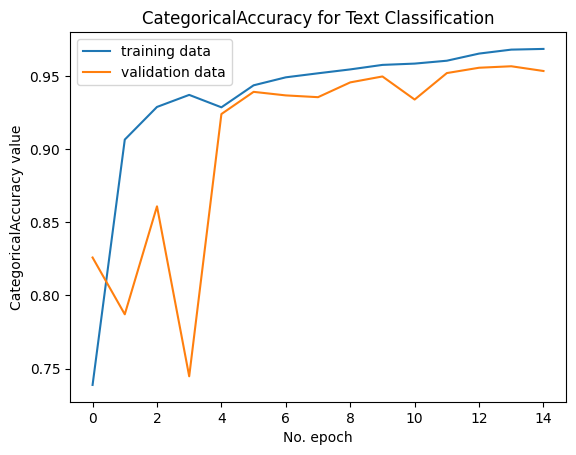

In [111]:
plt.plot(history.history['accuracy'], label='training data')
plt.plot(history.history['val_accuracy'], label='validation data')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

### Load the Best Model and Generate Predictions

This cell loads the previously saved best model and uses it to generate predictions on the test data.

1. **Load Best Model:**
   - **Model File:** `'best_model_updated.h5'`
   - The model is restored to its state with the best validation performance.

2. **Generate Predictions:**
   - **Data:** `X_test`
   - **Output:** Predictions for all test samples.

3. **Process Predictions:**
   - **`predictions.argmax(axis=1)`:** Determines the class with the highest probability for each sample, providing the predicted class indices.

**Inference:**
- **`y_pred`:** Contains the predicted class labels for the test samples. This can be used for further evaluation, such as comparing against true labels to calculate metrics like accuracy, precision, recall, and F1 score.

In [112]:
from tensorflow.keras.models import load_model

best_model = load_model('best_model_updated.h5')

In [123]:
print("Generate predictions for all samples")
predictions = best_model.predict(X_test)
print(predictions)
predict_results = predictions.argmax(axis=1)

Generate predictions for all samples
386/386 [==============================] - 19s 44ms/step
[[5.3536764e-04 7.3312607e-04 9.9873155e-01]
 [3.8749489e-04 6.9970777e-04 9.9891281e-01]
 [9.3359327e-01 3.2900345e-02 3.3506457e-02]
 ...
 [2.0250656e-05 9.9995244e-01 2.7317108e-05]
 [1.2089602e-02 1.6799482e-02 9.7111094e-01]
 [9.7273523e-01 1.4527229e-02 1.2737478e-02]]


In [150]:
print(predict_results.shape)
y_pred = predict_results
print(y_pred)

(12348,)
[2 2 0 ... 1 2 0]


### Calculating Accuracy

In [151]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.23%


### Classification Report

This cell prints a classification report that summarizes the performance of the model on the test data. It includes precision, recall, F1-score, and support for each sentiment class, as well as overall accuracy.

**Metrics:**
1. **Precision:** The ratio of correctly predicted positive observations to the total predicted positives. It indicates how many of the predicted instances for each class are actually correct.
2. **Recall:** The ratio of correctly predicted positive observations to all observations in the actual class. It measures how well the model identifies each class.
3. **F1-score:** The harmonic mean of precision and recall, providing a balance between the two metrics.
4. **Support:** The number of actual occurrences of each class in the test set.

**Results:**
- **Negative Sentiment:**
  - **Precision:** 0.88
  - **Recall:** 0.94
  - **F1-score:** 0.91
  - **Support:** 2553

- **Neutral Sentiment:**
  - **Precision:** 0.94
  - **Recall:** 0.93
  - **F1-score:** 0.94
  - **Support:** 1982

- **Positive Sentiment:**
  - **Precision:** 0.98
  - **Recall:** 0.96
  - **F1-score:** 0.97
  - **Support:** 7813

- **Overall Accuracy:** 0.95
- **Macro Average:**
  - **Precision:** 0.93
  - **Recall:** 0.94
  - **F1-score:** 0.94

- **Weighted Average:**
  - **Precision:** 0.95
  - **Recall:** 0.95
  - **F1-score:** 0.95

**Inference:**
- The model performs well across all sentiment classes with high precision, recall, and F1-scores.
- **Positive Sentiment** has the highest F1-score, indicating strong performance in identifying positive reviews.
- **Negative Sentiment** also shows strong performance, while **Neutral Sentiment** maintains balanced performance.
- The overall accuracy of 0.95 suggests that the model effectively classifies the majority of test samples correctly.

In [127]:
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

    negative       0.88      0.94      0.91      2553
     neutral       0.94      0.93      0.94      1982
    positive       0.98      0.96      0.97      7813

    accuracy                           0.95     12348
   macro avg       0.93      0.94      0.94     12348
weighted avg       0.95      0.95      0.95     12348



### Confusion Matrix

Text(50.722222222222214, 0.5, 'y_pred')

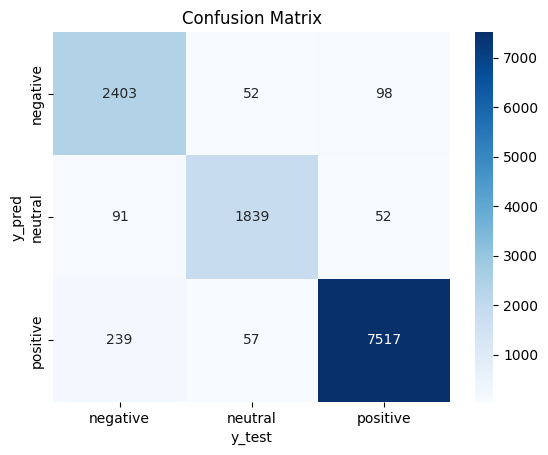

In [125]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

### ROC Curve and AUC

This cell calculates and plots the Receiver Operating Characteristic (ROC) curve and computes the Area Under the Curve (AUC) for each sentiment class. It also provides micro-average and macro-average ROC AUC scores, which summarize the model's overall performance.

1. **Binarize the Output Labels:**
   - Converts the test labels (`y_test`) into a binary format suitable for ROC computation.

2. **Compute ROC Curve and AUC for Each Class:**
   - Calculates the False Positive Rate (FPR) and True Positive Rate (TPR) for each class.
   - Computes the AUC for each class, which measures the model's ability to distinguish between classes.

3. **Micro-Average ROC Curve and AUC:**
   - Aggregates the contributions of all classes to compute the average ROC curve and AUC.

4. **Macro-Average ROC Curve and AUC:**
   - Calculates the average of the FPR and TPR across all classes to compute the macro-average ROC curve and AUC.

5. **Plot ROC Curves:**
   - Plots the ROC curves for each class along with the micro-average and macro-average ROC curves.

6. **Print Micro-Average and Macro-Average ROC AUC Scores:**
   - Displays the micro-average and macro-average AUC scores to summarize the model's performance.

**Inference:**
- **Micro-Average ROC AUC Score:** 0.99
- **Macro-Average ROC AUC Score:** 0.99
- The high micro-average and macro-average ROC AUC scores indicate that the model has excellent discriminative ability across all sentiment classes.
- The ROC curves for each class also demonstrate strong performance, with high AUC values close to 1, confirming the model's robustness in distinguishing between different sentiment categories.

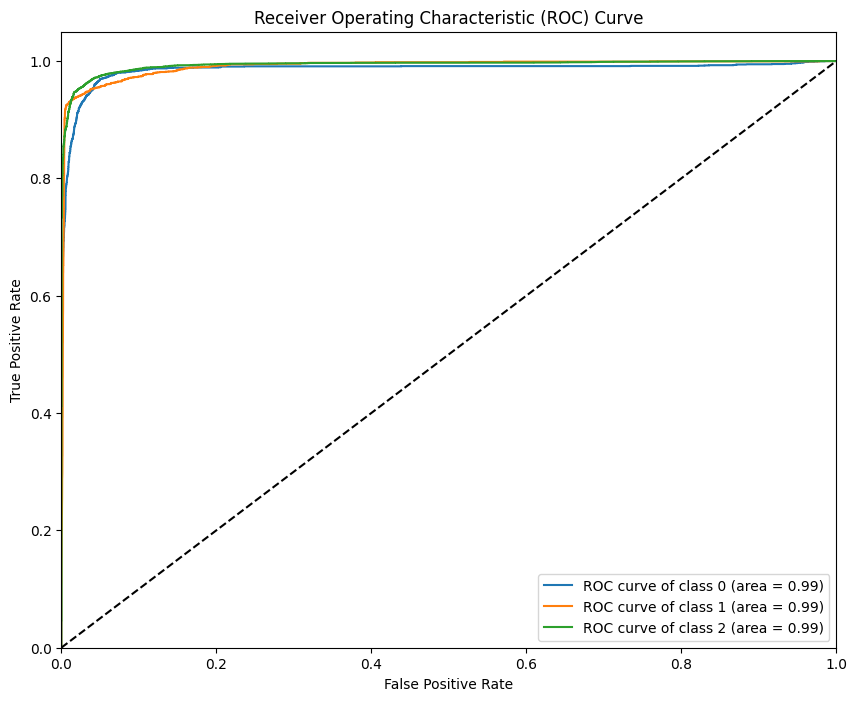

Micro-average ROC AUC score: 0.99
Macro-average ROC AUC score: 0.99


In [136]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

n_classes = predictions.shape[1]

# Binarize the output labels for ROC curve computation
y_val_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_binarized[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_binarized.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print micro-average and macro-average ROC AUC scores
print(f'Micro-average ROC AUC score: {roc_auc["micro"]:.2f}')
print(f'Macro-average ROC AUC score: {roc_auc["macro"]:.2f}')


### Now Applying CNN model to the same

In [152]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

model = Sequential([
    Embedding(vocab_size+1, embedding_dim, input_length=max_length, embeddings_regularizer = regularizers.l2(0.0005)),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(24, activation='relu', kernel_regularizer = regularizers.l2(0.0005), bias_regularizer = regularizers.l2(0.0005)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001))
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 133, 64)           4085824   
                                                                 
 conv1d (Conv1D)             (None, 129, 128)          41088     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 24)                3096      
                                                                 
 batch_normalization_6 (Batc  (None, 24)               96        
 hNormalization)                                      

In [154]:
# Callbacks
callbacks2 = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model_updated_CNN.h5', save_best_only=True)
]


In [155]:
# Fit the model with callbacks
history_CNN = model.fit(X_train, y_train, epochs=15, validation_split=0.2, batch_size=128, callbacks=callbacks2, class_weight=class_weights_dict)


Epoch 1/15
309/309 [==============================] - 30s 15ms/step - loss: 0.8012 - accuracy: 0.7221 - val_loss: 0.4778 - val_accuracy: 0.9107
Epoch 2/15
309/309 [==============================] - 4s 13ms/step - loss: 0.3865 - accuracy: 0.9079 - val_loss: 0.2887 - val_accuracy: 0.9321
Epoch 3/15
309/309 [==============================] - 4s 14ms/step - loss: 0.3169 - accuracy: 0.9241 - val_loss: 0.2668 - val_accuracy: 0.9318
Epoch 4/15
309/309 [==============================] - 4s 13ms/step - loss: 0.2858 - accuracy: 0.9310 - val_loss: 0.2722 - val_accuracy: 0.9305
Epoch 5/15
309/309 [==============================] - 4s 13ms/step - loss: 0.2624 - accuracy: 0.9364 - val_loss: 0.2888 - val_accuracy: 0.9260
Epoch 6/15
309/309 [==============================] - 4s 13ms/step - loss: 0.2483 - accuracy: 0.9415 - val_loss: 0.2731 - val_accuracy: 0.9346
Epoch 7/15
309/309 [==============================] - 4s 14ms/step - loss: 0.2300 - accuracy: 0.9467 - val_loss: 0.2647 - val_accuracy: 0.939

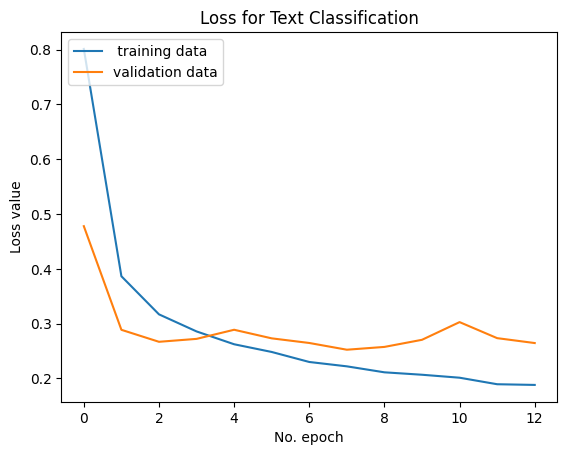

In [156]:
import matplotlib.pyplot as plt
plt.plot(history_CNN.history['loss'], label=' training data')
plt.plot(history_CNN.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

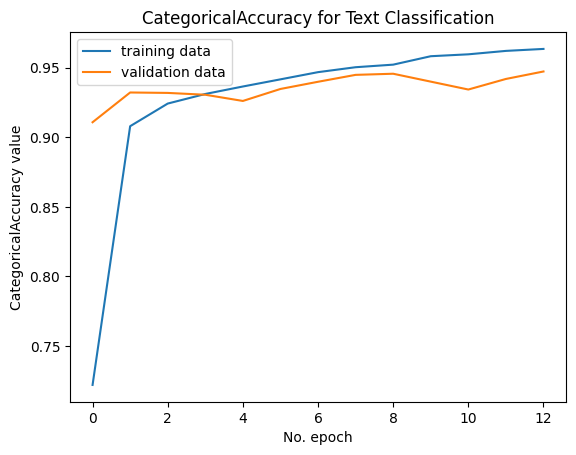

In [157]:
plt.plot(history_CNN.history['accuracy'], label='training data')
plt.plot(history_CNN.history['val_accuracy'], label='validation data')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [158]:
from tensorflow.keras.models import load_model

best_model_CNN = load_model('best_model_updated_CNN.h5')

In [159]:
print("Generate predictions for all samples")
predictions2 = best_model_CNN.predict(X_test)
print(predictions2)
predict_results2 = predictions2.argmax(axis=1)

Generate predictions for all samples
386/386 [==============================] - 1s 3ms/step
[[5.33726159e-03 4.16159164e-03 9.90501165e-01]
 [8.97327045e-05 4.58541072e-05 9.99864340e-01]
 [9.79670525e-01 1.66125735e-03 1.86681971e-02]
 ...
 [4.31169756e-03 9.94964838e-01 7.23539968e-04]
 [8.30030367e-02 1.09085046e-01 8.07911932e-01]
 [9.91276979e-01 1.33279676e-03 7.39022205e-03]]


In [160]:
print(predict_results2.shape)
y_pred2 = predict_results2
print(y_pred2)

(12348,)
[2 2 0 ... 1 2 0]


In [164]:
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y_test, y_pred2)
print(f'Accuracy_CNN: {accuracy2 * 100:.2f}%')

Accuracy_CNN: 93.83%


In [162]:
print(classification_report(y_test, y_pred2, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

    negative       0.82      0.94      0.88      2553
     neutral       0.95      0.93      0.94      1982
    positive       0.98      0.94      0.96      7813

    accuracy                           0.94     12348
   macro avg       0.92      0.94      0.93     12348
weighted avg       0.94      0.94      0.94     12348



Text(50.722222222222214, 0.5, 'y_pred')

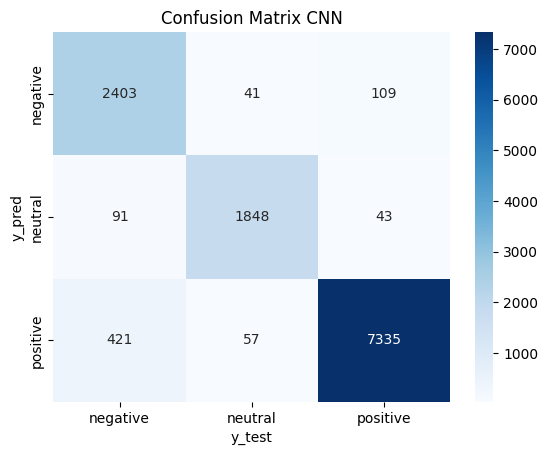

In [165]:
cm=confusion_matrix(y_test,y_pred2)
ax=sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
ax.set_title('Confusion Matrix CNN')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

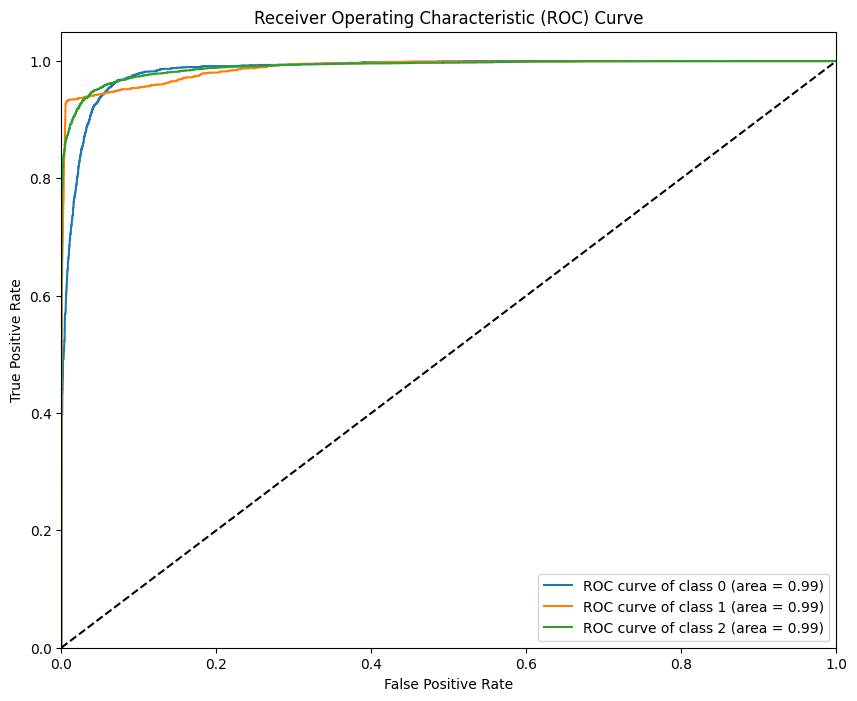

Micro-average ROC AUC score: 0.99
Macro-average ROC AUC score: 0.99


In [167]:
# Compute ROC curve and ROC area for each class
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()

for i in range(n_classes):
    fpr2[i], tpr2[i], _ = roc_curve(y_val_binarized[:, i], predictions2[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])

# Compute micro-average ROC curve and ROC area
fpr2["micro"], tpr2["micro"], _ = roc_curve(y_val_binarized.ravel(), predictions2.ravel())
roc_auc2["micro"] = auc(fpr2["micro"], tpr2["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr2[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr2[i], tpr2[i])
mean_tpr /= n_classes

fpr2["macro"] = all_fpr
tpr2["macro"] = mean_tpr
roc_auc2["macro"] = auc(fpr2["macro"], tpr2["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr2[i], tpr2[i], label=f'ROC curve of class {i} (area = {roc_auc2[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print micro-average and macro-average ROC AUC scores
print(f'Micro-average ROC AUC score: {roc_auc2["micro"]:.2f}')
print(f'Macro-average ROC AUC score: {roc_auc2["macro"]:.2f}')


### Now Applying RNN Model

In [175]:
from tensorflow.keras.layers import SimpleRNN

model = Sequential([
    Embedding(vocab_size+1, embedding_dim, input_length=max_length, embeddings_regularizer = regularizers.l2(0.0005)),
    SimpleRNN(128, return_sequences=True),
    BatchNormalization(),
    Dropout(0.5),
    SimpleRNN(64),
    BatchNormalization(),
    Dropout(0.5),
    Dense(24, activation='relu', kernel_regularizer = regularizers.l2(0.0005), bias_regularizer = regularizers.l2(0.0005)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001))
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 133, 64)           4085824   
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 133, 128)          24704     
                                                                 
 batch_normalization_19 (Bat  (None, 133, 128)         512       
 chNormalization)                                                
                                                                 
 dropout_20 (Dropout)        (None, 133, 128)          0         
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 64)                12352     
                                                                 
 batch_normalization_20 (Bat  (None, 64)               256       
 chNormalization)                                     

In [176]:
# Callbacks
callbacks3 = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model_updated_RNN.h5', save_best_only=True)
]


In [177]:
# Fit the model with callbacks
history_RNN = model.fit(X_train, y_train, epochs=15, validation_split=0.2, batch_size=128, callbacks=callbacks3, class_weight=class_weights_dict)


Epoch 1/15
309/309 [==============================] - 174s 551ms/step - loss: 1.5075 - accuracy: 0.3441 - val_loss: 1.4246 - val_accuracy: 0.2100
Epoch 2/15
309/309 [==============================] - 171s 554ms/step - loss: 1.1384 - accuracy: 0.4447 - val_loss: 1.0881 - val_accuracy: 0.6400
Epoch 3/15
309/309 [==============================] - 171s 553ms/step - loss: 1.0938 - accuracy: 0.5599 - val_loss: 1.0510 - val_accuracy: 0.6520
Epoch 4/15
309/309 [==============================] - 170s 550ms/step - loss: 1.0762 - accuracy: 0.6212 - val_loss: 1.0506 - val_accuracy: 0.6540
Epoch 5/15
309/309 [==============================] - 170s 549ms/step - loss: 1.0681 - accuracy: 0.6093 - val_loss: 1.0519 - val_accuracy: 0.6568
Epoch 6/15
309/309 [==============================] - 172s 558ms/step - loss: 1.0653 - accuracy: 0.6004 - val_loss: 1.0394 - val_accuracy: 0.6605
Epoch 7/15
309/309 [==============================] - 173s 559ms/step - loss: 1.0606 - accuracy: 0.6125 - val_loss: 1.0517 -

### Not getting desired result  from SimpleRNN, so trying GRU instead

In [181]:
from tensorflow.keras.layers import GRU

model = Sequential([
    Embedding(vocab_size + 1, embedding_dim, input_length=max_length, embeddings_regularizer=regularizers.l2(0.0005)),
    Bidirectional(GRU(128, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.5),
    Bidirectional(GRU(64)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(24, activation='relu', kernel_regularizer=regularizers.l2(0.0005), bias_regularizer=regularizers.l2(0.0005)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.001), bias_regularizer=regularizers.l2(0.001))
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 133, 64)           4085824   
                                                                 
 bidirectional_6 (Bidirectio  (None, 133, 256)         148992    
 nal)                                                            
                                                                 
 batch_normalization_25 (Bat  (None, 133, 256)         1024      
 chNormalization)                                                
                                                                 
 dropout_26 (Dropout)        (None, 133, 256)          0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 128)              123648    
 nal)                                                            
                                                      

In [182]:
# Callbacks
callbacks4 = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model_updated_GRU.h5', save_best_only=True)
]


### Here using batch size = 256 as Larger batch sizes can lead to faster training as they make better use of parallel processing capabilities of GPUs

In [183]:
# Fit the model with callbacks
history_GRU = model.fit(X_train, y_train, epochs=15, validation_split=0.2, batch_size=256, callbacks=callbacks4, class_weight=class_weights_dict)

Epoch 1/15
155/155 [==============================] - 35s 159ms/step - loss: 1.1130 - accuracy: 0.6018 - val_loss: 1.4627 - val_accuracy: 0.1949
Epoch 2/15
155/155 [==============================] - 22s 143ms/step - loss: 0.4379 - accuracy: 0.8753 - val_loss: 1.2530 - val_accuracy: 0.5634
Epoch 3/15
155/155 [==============================] - 22s 145ms/step - loss: 0.3271 - accuracy: 0.9255 - val_loss: 0.7095 - val_accuracy: 0.7899
Epoch 4/15
155/155 [==============================] - 21s 139ms/step - loss: 0.2883 - accuracy: 0.9361 - val_loss: 0.3436 - val_accuracy: 0.9088
Epoch 5/15
155/155 [==============================] - 22s 143ms/step - loss: 0.2602 - accuracy: 0.9434 - val_loss: 0.4580 - val_accuracy: 0.8365
Epoch 6/15
155/155 [==============================] - 23s 145ms/step - loss: 0.2460 - accuracy: 0.9465 - val_loss: 0.2679 - val_accuracy: 0.9397
Epoch 7/15
155/155 [==============================] - 23s 147ms/step - loss: 0.2240 - accuracy: 0.9514 - val_loss: 0.2403 - val_ac

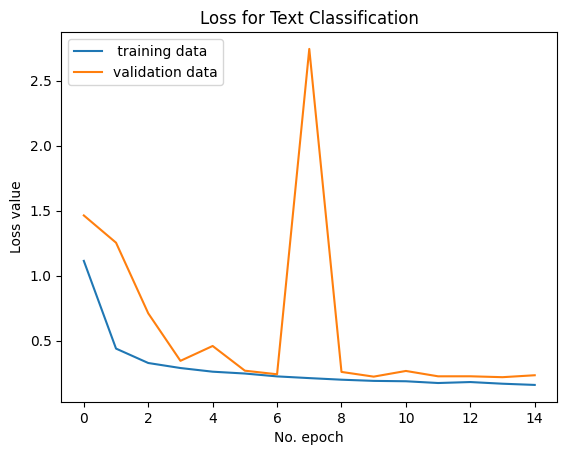

In [184]:
plt.plot(history_GRU.history['loss'], label=' training data')
plt.plot(history_GRU.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

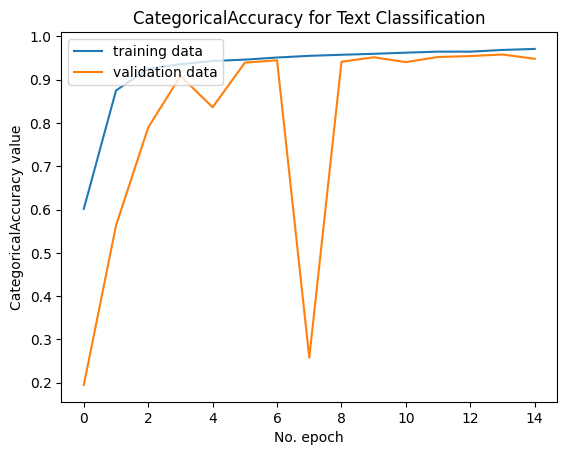

In [185]:
plt.plot(history_GRU.history['accuracy'], label='training data')
plt.plot(history_GRU.history['val_accuracy'], label='validation data')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [186]:
from tensorflow.keras.models import load_model

best_model_GRU = load_model('best_model_updated_GRU.h5')

In [190]:
print("Generate predictions for all samples")
predictions3 = best_model_GRU.predict(X_test)
print(predictions3)
predict_results3 = predictions3.argmax(axis=1)

Generate predictions for all samples
386/386 [==============================] - 16s 37ms/step
[[6.3084374e-04 2.0047897e-03 9.9736434e-01]
 [1.7161135e-04 4.6682850e-04 9.9936157e-01]
 [1.4450189e-01 2.0425615e-01 6.5124202e-01]
 ...
 [1.1195627e-05 9.9996841e-01 2.0392145e-05]
 [1.0631834e-02 2.0734798e-02 9.6863335e-01]
 [9.9715924e-01 2.0321775e-03 8.0855557e-04]]


In [191]:
print(predict_results3.shape)
y_pred3 = predict_results3
print(y_pred3)

(12348,)
[2 2 2 ... 1 2 0]


In [192]:
accuracy3 = accuracy_score(y_test, y_pred3)
print(f'Accuracy_GRU: {accuracy3 * 100:.2f}%')

Accuracy_GRU: 95.42%


In [193]:
print(classification_report(y_test, y_pred3, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

    negative       0.89      0.93      0.91      2553
     neutral       0.95      0.93      0.94      1982
    positive       0.98      0.97      0.97      7813

    accuracy                           0.95     12348
   macro avg       0.94      0.94      0.94     12348
weighted avg       0.95      0.95      0.95     12348



Text(50.722222222222214, 0.5, 'y_pred')

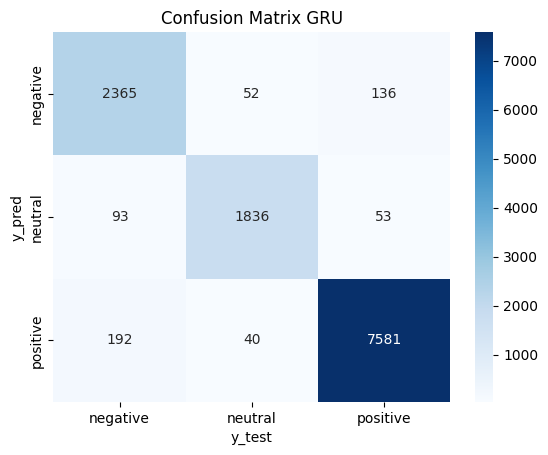

In [194]:
cm3=confusion_matrix(y_test,y_pred3)
ax=sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
ax.set_title('Confusion Matrix GRU')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

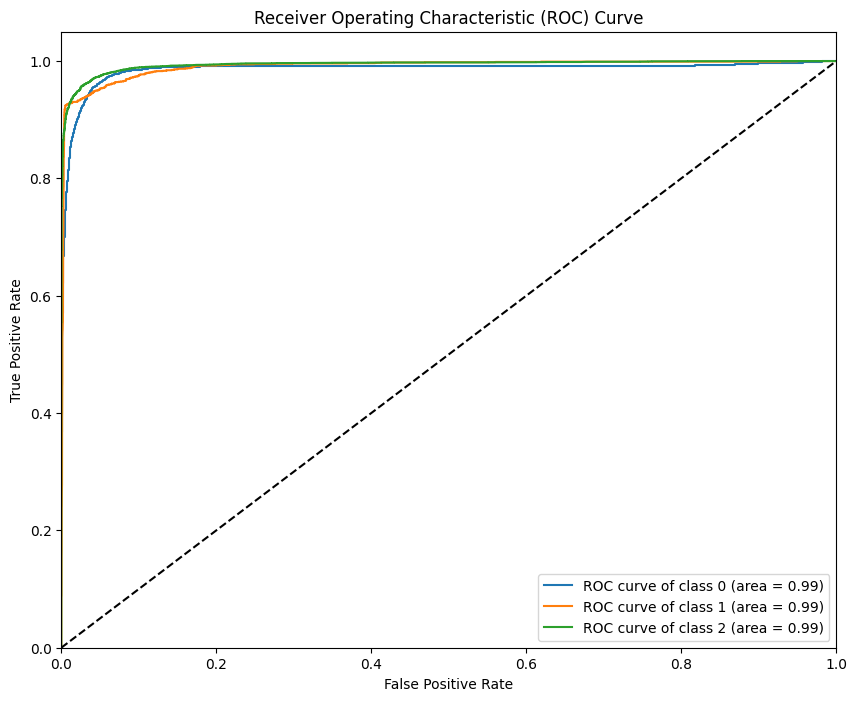

Micro-average ROC AUC score: 0.99
Macro-average ROC AUC score: 0.99


In [195]:
# Compute ROC curve and ROC area for each class
fpr3 = dict()
tpr3 = dict()
roc_auc3 = dict()

for i in range(n_classes):
    fpr3[i], tpr3[i], _ = roc_curve(y_val_binarized[:, i], predictions3[:, i])
    roc_auc3[i] = auc(fpr3[i], tpr3[i])

# Compute micro-average ROC curve and ROC area
fpr3["micro"], tpr3["micro"], _ = roc_curve(y_val_binarized.ravel(), predictions3.ravel())
roc_auc3["micro"] = auc(fpr3["micro"], tpr3["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr3[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr3[i], tpr3[i])
mean_tpr /= n_classes

fpr3["macro"] = all_fpr
tpr3["macro"] = mean_tpr
roc_auc3["macro"] = auc(fpr3["macro"], tpr3["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(fpr3[i], tpr3[i], label=f'ROC curve of class {i} (area = {roc_auc3[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print micro-average and macro-average ROC AUC scores
print(f'Micro-average ROC AUC score: {roc_auc3["micro"]:.2f}')
print(f'Macro-average ROC AUC score: {roc_auc3["macro"]:.2f}')


### Conclusion: `Best Performing Model` here is `GRU` and then `LSTM` 